In [1]:
import pandas as pd

csf_prediction = pd.read_csv("csf_status_predictions_4667_400_0506.csv")
plasma_prediction = pd.read_csv("plasma_status_predictions_4750_700_0506.csv")

In [4]:
neuro_pheno = pd.read_excel("Neuropath_Ellen_Jan2025_cc.xlsx", sheet_name="Final")
# neuro_pheno

In [5]:
neuro_pheno.columns

Index(['id', 'Final Status', 'Tissue_ID', 'Autopsy_Numb', 'BB#', 'sex', 'YOE',
       'YOB', 'AAO', 'AOD', 'Duration', 'DeathCDR', 'CDR_final', 'PMI',
       'FreshBWT', 'B score_BraakTau_NACCBRAA_NPBRAAK', 'BraakAbeta',
       'DLB_Braak', 'TDP', 'Asyn', 'APOE', 'A score_NPTHAL',
       'C score_NACCNEUR_NPNEUR', 'ABC score_ADNC', 'NACCLEWY', 'NPLBOD',
       'NPFTDT2', 'NACCCBD', 'NACCPROG', 'NPFTDTDP', 'NPPDXP', 'NPPDXQ',
       'NPNIT_Reagan criteria', 'NPCERAD criteria',
       'NPADRDA_Khachaturian criteria', 'NPPNORM', 'NPCNORM', 'NPPADP',
       'NPCADP', 'NPPAD', 'NPCAD', 'NPPLEWY', 'NPPFTLD', 'NPCFTLD',
       'NACCBRNN'],
      dtype='object')

In [6]:
neuro_pheno["merge_key"] = "MAP_" + neuro_pheno["id"].astype(str)

csf_merged_df = pd.merge(csf_prediction, neuro_pheno, how="left",
                     left_on="UniquePhenoID", right_on="merge_key")

In [7]:
# csf_merged_df.to_csv("csf_prediction_merged_neuro_pheno.csv", index=False)

In [8]:
# neuro_pheno["merge_key"] = "MAP_" + neuro_pheno["id"].astype(str)

plasma_merged_df = pd.merge(plasma_prediction, neuro_pheno, how="left",
                     left_on="UniquePhenoID", right_on="merge_key")

In [9]:
# plasma_merged_df.to_csv("plasma_prediction_merged_neuro_pheno.csv", index=False)

In [10]:
plasma_merged_df['C score_NACCNEUR_NPNEUR'].value_counts()

C score_NACCNEUR_NPNEUR
Frequent neuritic plaques (C3)    261
No neuritic plaques (C0)          158
Sparse neuritic plaques (C1)       95
Moderate neuritic plaques (C2)     92
Name: count, dtype: int64

In [11]:
csf_merged_df.columns

Index(['UniquePhenoID', 'DrawDate', 'Status_at_draw', 'Age_at_draw',
       'Age_onset', 'Age_at_last', 'Sex', 'Final_Status_Data', 'Final_Status',
       'AT Status', 'Amyloid PET Imaging', 'ptau217', 'CDR_score_closest',
       'Predicted Class', 'AD Probability', 'CO Probability',
       'DLB Probability', 'FTD Probability', 'PD Probability', 'id',
       'Final Status', 'Tissue_ID', 'Autopsy_Numb', 'BB#', 'sex', 'YOE', 'YOB',
       'AAO', 'AOD', 'Duration', 'DeathCDR', 'CDR_final', 'PMI', 'FreshBWT',
       'B score_BraakTau_NACCBRAA_NPBRAAK', 'BraakAbeta', 'DLB_Braak', 'TDP',
       'Asyn', 'APOE', 'A score_NPTHAL', 'C score_NACCNEUR_NPNEUR',
       'ABC score_ADNC', 'NACCLEWY', 'NPLBOD', 'NPFTDT2', 'NACCCBD',
       'NACCPROG', 'NPFTDTDP', 'NPPDXP', 'NPPDXQ', 'NPNIT_Reagan criteria',
       'NPCERAD criteria', 'NPADRDA_Khachaturian criteria', 'NPPNORM',
       'NPCNORM', 'NPPADP', 'NPCADP', 'NPPAD', 'NPCAD', 'NPPLEWY', 'NPPFTLD',
       'NPCFTLD', 'NACCBRNN', 'merge_key'],
     

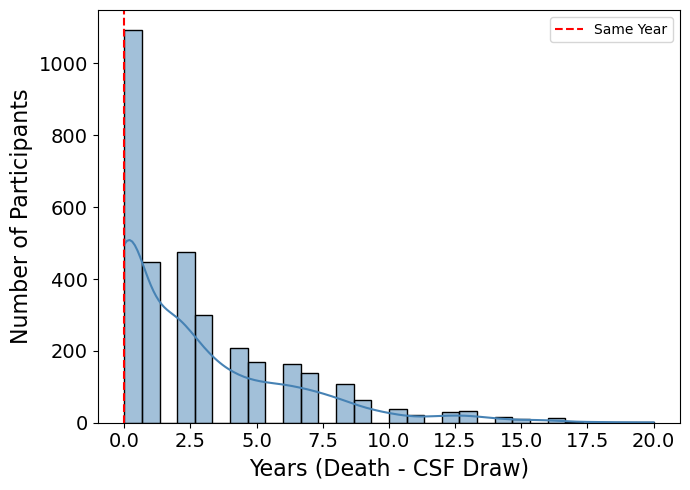

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the time difference in years
csf_merged_df['Years_Between_Death_and_CSF'] = csf_merged_df['Age_at_last'] - csf_merged_df['Age_at_draw']

# Drop NA or invalid values
valid_years = csf_merged_df['Years_Between_Death_and_CSF'].dropna()

# Plot the distribution
plt.figure(figsize=(7, 5))
sns.histplot(valid_years, kde=True, bins=30, color='steelblue')
plt.axvline(0, color='red', linestyle='--', label='Same Year')
# plt.title('Distribution of Years Between Death and CSF Draw')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Years (Death - CSF Draw)', size=16)
plt.ylabel('Number of Participants', size=16)
plt.legend()
plt.tight_layout()
plt.show()

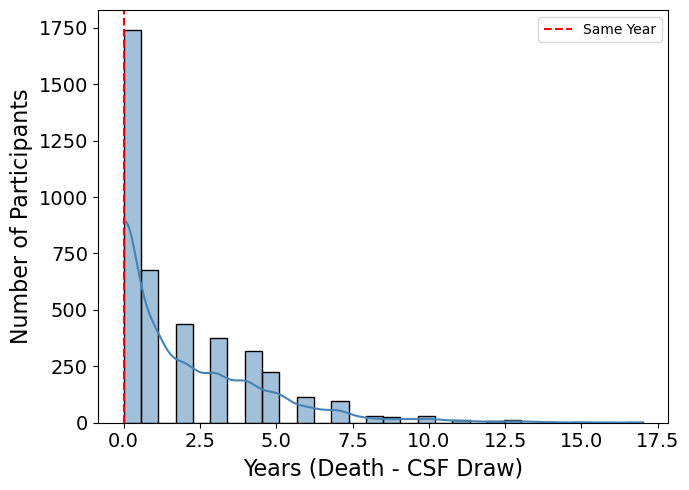

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the time difference in years
plasma_merged_df['Years_Between_Death_and_CSF'] = plasma_merged_df['Age_at_last'] - plasma_merged_df['Age_at_draw']

# Drop NA or invalid values
valid_years = plasma_merged_df['Years_Between_Death_and_CSF'].dropna()

# Plot the distribution
plt.figure(figsize=(7, 5))
sns.histplot(valid_years, kde=True, bins=30, color='steelblue')
plt.axvline(0, color='red', linestyle='--', label='Same Year')
# plt.title('Distribution of Years Between Death and CSF Draw')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Years (Death - CSF Draw)', size=16)
plt.ylabel('Number of Participants', size=16)
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
csf_merged_df['B score_BraakTau_NACCBRAA_NPBRAAK'].value_counts()
csf_merged_df['C score_NACCNEUR_NPNEUR'].value_counts()

C score_NACCNEUR_NPNEUR
Frequent neuritic plaques (C3)    72
No neuritic plaques (C0)          48
Sparse neuritic plaques (C1)      31
Moderate neuritic plaques (C2)    25
Name: count, dtype: int64

C:\Users\x.ying1\AppData\Local\Temp\ipykernel_21056\3547938593.py:38: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.barplot(


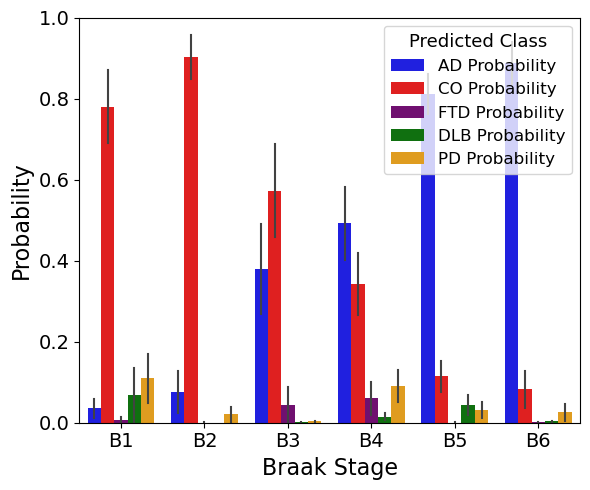

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_vars = ['AD Probability', 'CO Probability', 'FTD Probability', 'DLB Probability', 'PD Probability']
colors = ['blue', 'red', 'purple', 'green', 'orange']
palette = dict(zip(y_vars, colors))

categorical_vars = ['B score_BraakTau_NACCBRAA_NPBRAAK']

braak_mapping = {
    'Stage 0, AD-type neurofibrillary degeneration not present (BO)': 'B0',
    'Stage 1 (B1)': 'B1',
    'Stage 2 (B1)': 'B2',
    'Stage 3 (B2)': 'B3',
    'Stage 4 (B2)': 'B4',
    'Stage 5 (B3)': 'B5',
    'Stage 6 (B3)': 'B6'
}

# braak_order = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6']
braak_order = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6']

for var in categorical_vars:
    plot_data = csf_merged_df[[var] + y_vars].dropna()
    plot_data = plot_data[plot_data[var].isin(braak_mapping.keys())].copy()
    plot_data['Braak Stage'] = plot_data[var].map(braak_mapping)

    plot_data_melted = plot_data.melt(
        id_vars='Braak Stage',
        value_vars=y_vars,
        var_name='Prediction',
        value_name='Probability'
    )

    plt.figure(figsize=(6, 5))
    sns.barplot(
        data=plot_data_melted,
        x='Braak Stage',
        y='Probability',
        hue='Prediction',
        estimator=np.mean,
        errorbar='se',
        palette=palette,
        order=braak_order,
        errwidth=1.5
    )

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(0, 1)
    plt.xlabel("Braak Stage", size=16)
    plt.ylabel("Probability", size=16)
    plt.legend(title='Predicted Class', loc='upper right', fontsize=12, title_fontsize=13)
    plt.tight_layout()
    plt.show()

In [16]:
summary_stats = (
    plot_data_melted
    .groupby(['Braak Stage', 'Prediction'])
    .agg(
        Mean_Probability=('Probability', 'mean'),
        SE_Probability=('Probability', lambda x: x.std() / np.sqrt(len(x)))
    )
    .reset_index()
)

print(summary_stats)

   Braak Stage       Prediction  Mean_Probability  SE_Probability
0           B0   AD Probability      1.020766e-06    9.315180e-07
1           B0   CO Probability      4.999977e-01    4.999965e-01
2           B0  DLB Probability      1.022168e-07    8.865350e-08
3           B0  FTD Probability      4.999993e-01    4.999992e-01
4           B0   PD Probability      1.883568e-06    1.645921e-06
5           B1   AD Probability      3.527681e-02    2.355135e-02
6           B1   CO Probability      7.799344e-01    9.081942e-02
7           B1  DLB Probability      6.892040e-02    6.614924e-02
8           B1  FTD Probability      6.612862e-03    6.326086e-03
9           B1   PD Probability      1.092556e-01    6.017040e-02
10          B2   AD Probability      7.568486e-02    5.169799e-02
11          B2   CO Probability      9.031198e-01    5.391511e-02
12          B2  DLB Probability      2.200184e-04    1.432338e-04
13          B2  FTD Probability      3.428718e-04    2.517596e-04
14        

C:\Users\x.ying1\AppData\Local\Temp\ipykernel_21056\1948364646.py:32: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.barplot(


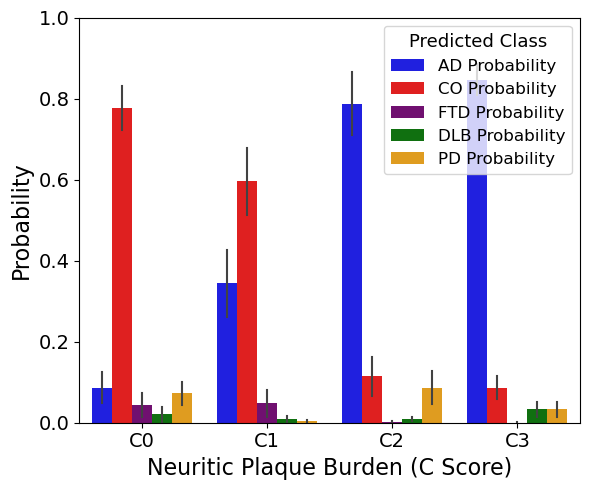

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_vars = ['AD Probability', 'CO Probability', 'FTD Probability', 'DLB Probability', 'PD Probability']
colors = ['blue', 'red', 'purple', 'green', 'orange']
palette = dict(zip(y_vars, colors))

c_mapping = {
    'No neuritic plaques (C0)': 'C0',
    'Sparse neuritic plaques (C1)': 'C1',
    'Moderate neuritic plaques (C2)': 'C2',
    'Frequent neuritic plaques (C3)': 'C3'
}

c_order = ['C0', 'C1', 'C2', 'C3']

var = 'C score_NACCNEUR_NPNEUR'
plot_data = csf_merged_df[[var] + y_vars].dropna()
plot_data = plot_data[plot_data[var].isin(c_mapping.keys())].copy()
plot_data['C Score'] = plot_data[var].map(c_mapping)

plot_data_melted = plot_data.melt(
    id_vars='C Score',
    value_vars=y_vars,
    var_name='Prediction',
    value_name='Probability'
)

plt.figure(figsize=(6, 5))
sns.barplot(
    data=plot_data_melted,
    x='C Score',
    y='Probability',
    hue='Prediction',
    estimator=np.mean,
    errorbar='se',
    palette=palette,
    order=c_order,
    errwidth=1.5
)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 1)
plt.xlabel("Neuritic Plaque Burden (C Score)", size=16)
plt.ylabel("Probability", size=16)
plt.legend(title='Predicted Class', loc='upper right', fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()
